In [39]:
from finlab import data
import finlab
from dotenv import load_dotenv
import os
import datetime

def config():
    load_dotenv()


    
config()

finlab.login(str(os.getenv('FINLAB_API')))

輸入成功!


In [40]:
roe = data.get('fundamental_features:ROE稅後')
price_df = data.get('etl:adj_open')

In [41]:
cleaned_roe = roe.dropna(axis=1)


In [33]:
cleaned_roe[[filled_price_df.dropna(axis=1).columns]]

KeyError: "None of [Index([('0050', '0055', '0056', '0061', '006205', '006206', '006207', '1102', '1104', '1108', '1201', '1210', '1215', '1217', '1218', '1220', '1227', '1231', '1232', '1256', '1301', '1303', '1304', '1305', '1307', '1308', '1309', '1312', '1313', '1314', '1319', '1321', '1323', '1326', '1337', '1338', '1339', '1402', '1409', '1414', '1434', '1437', '1440', '1442', '1444', '1445', '1446', '1447', '1452', '1455', '1459', '1460', '1463', '1464', '1467', '1468', '1473', '1474', '1476', '1477', '1503', '1504', '1506', '1507', '1514', '1515', '1517', '1519', '1521', '1522', '1525', '1528', '1531', '1532', '1533', '1536', '1537', '1539', '1540', '1558', '1560', '1565', '1569', '1580', '1589', '1590', '1597', '1605', '1608', '1609', '1612', '1616', '1618', '1701', '1702', '1707', '1708', '1710', '1711', '1712', ...)], dtype='object', name='symbol')] are in the [columns]"

In [13]:
cleaned_roe.index.to_list()

['2013-Q1',
 '2013-Q2',
 '2013-Q3',
 '2013-Q4',
 '2014-Q1',
 '2014-Q2',
 '2014-Q3',
 '2014-Q4',
 '2015-Q1',
 '2015-Q2',
 '2015-Q3',
 '2015-Q4',
 '2016-Q1',
 '2016-Q2',
 '2016-Q3',
 '2016-Q4',
 '2017-Q1',
 '2017-Q2',
 '2017-Q3',
 '2017-Q4',
 '2018-Q1',
 '2018-Q2',
 '2018-Q3',
 '2018-Q4',
 '2019-Q1',
 '2019-Q2',
 '2019-Q3',
 '2019-Q4',
 '2020-Q1',
 '2020-Q2',
 '2020-Q3']

In [15]:
import pandas as pd

def buy_top_5_roe(df):
    """
    Given a DataFrame of ROE values for each quarter, select the top 5 symbols by ROE for each quarter.
    
    Parameters:
        df (DataFrame): The DataFrame containing ROE values, indexed by date and with stock symbols as columns.
        
    Returns:
        top_5_dict (dict): A dictionary with quarters as keys and lists of top 5 stock symbols as values.
    """
    # Initialize an empty dictionary to store the top 5 stocks for each quarter
    top_5_dict = {}
    
    # Loop through each quarter in the DataFrame index
    for quarter in df.index.to_list():
        # Select the data for that quarter
        quarter_data = df.loc[quarter]
        
        # Sort the data in descending order to get stocks with highest ROE first
        sorted_data = quarter_data.sort_values(ascending=False)
        
        # Select the top 5 stock symbols
        top_5_stocks = sorted_data.head(5).index.tolist()
        
        # Store the top 5 stocks in the dictionary
        top_5_dict[quarter] = top_5_stocks
    
    return top_5_dict


a = buy_top_5_roe(cleaned_roe).keys()
for i in a:
    print(i)

2013-Q1
2013-Q2
2013-Q3
2013-Q4
2014-Q1
2014-Q2
2014-Q3
2014-Q4
2015-Q1
2015-Q2
2015-Q3
2015-Q4
2016-Q1
2016-Q2
2016-Q3
2016-Q4
2017-Q1
2017-Q2
2017-Q3
2017-Q4
2018-Q1
2018-Q2
2018-Q3
2018-Q4
2019-Q1
2019-Q2
2019-Q3
2019-Q4
2020-Q1
2020-Q2
2020-Q3


In [11]:
price_df.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=1962, freq=None)

In [13]:
price_df.at[pd.to_datetime('2013-01-02'), '2330']
#df.at[index, stock_id]


97.6

False


In [46]:
# import pandas as pd

# #sometimes the date of the revealation of statements is weekend
# def get_work_day(y, m, d):
#         newInfo_day = datetime.datetime(y, m, d)
#         if newInfo_day.weekday() == 5:  # Saturday
#             newInfo_day += datetime.timedelta(days=2)
#         elif newInfo_day.weekday() == 6:  # Sunday
#             newInfo_day += datetime.timedelta(days=1)
#         return newInfo_day.strftime('%Y-%m-%d')
# def buy_top_5_roe(df):
#     """
#     Given a DataFrame of ROE values for each quarter, select the top 5 symbols by ROE for each quarter.
    
#     Parameters:
#         df (DataFrame): The DataFrame containing ROE values, indexed by date and with stock symbols as columns.
        
#     Returns:
#         top_5_dict (dict): A dictionary with quarters as keys and lists of top 5 stock symbols as values.
#     """
#     # Initialize an empty dictionary to store the top 5 stocks for each quarter
#     top_5_dict = {}
    
#     # Loop through each quarter in the DataFrame index
#     for quarter in df.index.to_list():
#         quarter = str(quarter)
#         # Select the data for that quarter
#         quarter_data = df.loc[quarter]
        
#         # Sort the data in descending order to get stocks with highest ROE first
#         sorted_data = quarter_data.sort_values(ascending=False)
        
#         # Select the top 5 stock symbols
#         top_5_stocks = sorted_data.head(5).index.tolist()
        
#         # Store the top 5 stocks in the dictionary
#         top_5_dict[quarter] = top_5_stocks
    
#     return top_5_dict

# def quarter_to_start_date(quarter):
#     """
#     Convert a quarter string 'YYYY-QX' to the starting date of that quarter 'YYYY-MM-DD'.
#     """
#     year, qtr = quarter.split('-Q')
#     start_month = {'1': ['01','01'], '2': ['04','01'], '3': ['07','01'], '4': ['10','01']}
#     if qtr in start_month:
#         return get_work_day(int(year), int(start_month[qtr][0]),int(start_month[qtr][1]) )
#     else:
#         raise ValueError("Invalid quarter format")



# def quarter_to_end_date(quarter):
#     """
#     Convert a quarter string 'YYYY-QX' to the ending date of that quarter 'YYYY-MM-DD'.
#     """
#     year, qtr = quarter.split('-Q')
#     end_month = {'1': ['03','31'], '2': ['06','30'], '3': ['09','30'], '4': ['12','31']}
#     if qtr in end_month:
#         return get_work_day(int(year), int(end_month[qtr][0]),int(end_month[qtr][1]) )
#     else:
#         raise ValueError("Invalid quarter format")

# def calculate_profit(price_data, roe_data):    
#     profits = []
#     quarters = []
#     previous_quarter_stocks = []
#     previous_end_date =None
#     top_5_roe_dict = buy_top_5_roe(roe_data)
    
    
#     for quarter in top_5_roe_dict.keys():
#         current_quarter_stocks = top_5_roe_dict[quarter]
#         profit = 0
#         # Convert quarter to actual date
#         if previous_end_date is None:
#             start_date = quarter_to_start_date(quarter)
#         else:
#             start_date = previous_end_date

#         end_date = quarter_to_end_date(quarter)


#         # Calculate profit for stocks held from previous quarter
#         for stock in previous_quarter_stocks:
#             if stock in price_data:
#                 print(start_date)
#                 start_price = price_data.at[start_date, stock]
#                 end_price = price_data.at[end_date, stock]
#                 profit += end_price - start_price
        
#         # Update for the next iteration
#         previous_end_date = end_date
#         previous_quarter_stocks = current_quarter_stocks
#         #print(profit)
#         profits.append(profit)
#         quarters.append(quarter)

#     result = pd.Series(profits, index=quarters)
#     return result

#     # Now 'profits' contains the profit for each quarter.
# result = calculate_profit(price_data=price_df, roe_data=cleaned_roe)


# result

2013-04-01
2013-04-01
2013-04-01
2013-04-01
2013-04-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-09-30
2013-09-30
2013-09-30
2013-09-30
2013-09-30
2013-12-31
2013-12-31
2013-12-31
2013-12-31
2013-12-31
2014-03-31
2014-03-31
2014-03-31
2014-03-31
2014-03-31
2014-06-30
2014-06-30
2014-06-30
2014-06-30
2014-06-30
2014-09-30
2014-09-30
2014-09-30
2014-09-30
2014-09-30
2014-12-31
2014-12-31
2014-12-31
2014-12-31
2014-12-31
2015-03-31
2015-03-31
2015-03-31
2015-03-31
2015-03-31
2015-06-30
2015-06-30
2015-06-30
2015-06-30
2015-06-30
2015-09-30
2015-09-30
2015-09-30
2015-09-30
2015-09-30
2015-12-31
2015-12-31
2015-12-31
2015-12-31
2015-12-31
2016-03-31
2016-03-31
2016-03-31
2016-03-31
2016-03-31
2016-06-30
2016-06-30
2016-06-30
2016-06-30
2016-06-30
2016-09-30
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas/_libs/index.pyx", line 581, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 2606, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 2630, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1483315200000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/max/Library/Python/3.11/lib/python/site-packages/pandas/core/indexes/base.py", line 3652, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas/_libs/index.pyx", line 549, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas/_libs/index.pyx", line 583, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2017-01-02 00:00:00')

The above exception was the direct cause of the following exception:

Traceback (most recent cal

In [31]:
result

2013-Q1    [[[[[...], [...], [...], [...], [...], [...], ...
2013-Q2    [[[[[...], [...], [...], [...], [...], [...], ...
2013-Q3    [[[[[...], [...], [...], [...], [...], [...], ...
2013-Q4    [[[[[...], [...], [...], [...], [...], [...], ...
2014-Q1    [[[[[...], [...], [...], [...], [...], [...], ...
2014-Q2    [[[[[...], [...], [...], [...], [...], [...], ...
2014-Q3    [[[[[...], [...], [...], [...], [...], [...], ...
2014-Q4    [[[[[...], [...], [...], [...], [...], [...], ...
2015-Q1    [[[[[...], [...], [...], [...], [...], [...], ...
2015-Q2    [[[[[...], [...], [...], [...], [...], [...], ...
2015-Q3    [[[[[...], [...], [...], [...], [...], [...], ...
2015-Q4    [[[[[...], [...], [...], [...], [...], [...], ...
2016-Q1    [[[[[...], [...], [...], [...], [...], [...], ...
2016-Q2    [[[[[...], [...], [...], [...], [...], [...], ...
2016-Q3    [[[[[...], [...], [...], [...], [...], [...], ...
2016-Q4    [[[[[...], [...], [...], [...], [...], [...], ...
2017-Q1    [[[[[...], [.

In [55]:
import pandas as pd
import datetime
import numpy as np
def fill_missing_dates(df):
    """
    Fill missing dates in a DataFrame with the last known data point.
    
    Parameters:
        df (pd.DataFrame): DataFrame with DateTimeIndex and financial data.
        
    Returns:
        pd.DataFrame: DataFrame with no missing dates and forward-filled data.
    """
    # Ensure the DataFrame is sorted by date
    df = df.sort_index()
    
    # Create a new index that fills in any missing dates
    all_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
    
    # Reindex the DataFrame with the new index, forward-filling missing data
    df_filled = df.reindex(all_dates, method='ffill')
    
    #fill the nan
    df_filled.fillna(method='ffill', inplace=True)
    return df_filled

# Ensure the date of the revelation of statements is a workday
def get_work_day(y, m, d):
    newInfo_day = datetime.datetime(y, m, d)
    if newInfo_day.weekday() == 5:  # Saturday
        newInfo_day += datetime.timedelta(days=2)
    elif newInfo_day.weekday() == 6:  # Sunday
        newInfo_day += datetime.timedelta(days=1)
    return newInfo_day

# Buy top 5 stocks based on ROE
def buy_top_5_roe(df):
    top_5_dict = {}
    for quarter in df.index:
        # Sort the data to get stocks with highest ROE first
        sorted_data = df.loc[quarter].sort_values(ascending=False)
        top_5_stocks = sorted_data.head(5).index.tolist()
        top_5_dict[quarter] = top_5_stocks
    return top_5_dict

# Convert quarter to start date
def quarter_to_start_date(quarter):
    year, qtr = quarter.split('-Q')
    start_month = {'1': '01', '2': '04', '3': '07', '4': '10'}
    if qtr in start_month:
        return get_work_day(int(year), int(start_month[qtr]), 1)
    else:
        raise ValueError("Invalid quarter format")

# Convert quarter to end date
def quarter_to_end_date(quarter):
    year, qtr = quarter.split('-Q')
    end_month = {'1': '03', '2': '06', '3': '09', '4': '12'}
    end_day = {'1': '31', '2': '30', '3': '30', '4': '31'}
    if qtr in end_month:
        return get_work_day(int(year), int(end_month[qtr]), int(end_day[qtr]))
    else:
        raise ValueError("Invalid quarter format")

# Calculate profit based on ROE and stock prices
def calculate_profit(price_data, roe_data):    
    profits = []
    quarters = []
    previous_quarter_stocks = []
    previous_end_date = None
    top_5_roe_dict = buy_top_5_roe(roe_data)
    
    for quarter in top_5_roe_dict:
        current_quarter_stocks = top_5_roe_dict[quarter]
        profit = 0
        start_date = quarter_to_start_date(quarter) if previous_end_date is None else previous_end_date
        end_date = quarter_to_end_date(quarter)

        for stock in previous_quarter_stocks:
            if stock in price_data.columns:
                start_price = price_data.at[start_date, stock]
                end_price = price_data.at[end_date, stock]
                profit += end_price - start_price
                if end_price == np.nan or start_price == np.nan:
                    print(f'stock: {stock}')
                    print(f'start_price : {start_price}')
                    print(f'end_price : {end_price}')
        
        previous_end_date = end_date
        previous_quarter_stocks = current_quarter_stocks
        profits.append(profit)
        quarters.append(quarter)

    return pd.Series(profits, index=quarters)

# Assume 'price_df' and 'cleaned_roe' are defined elsewhere in your code
# result = calculate_profit(price_data=price_df, roe_data=cleaned_roe)
# print(result)
filled_price_df = fill_missing_dates(price_df)
result = calculate_profit(filled_price_df, cleaned_roe)
result


2013-Q1      0.000000
2013-Q2     33.080000
2013-Q3     -0.668225
2013-Q4     -2.640358
2014-Q1    -13.603273
2014-Q2     10.010000
2014-Q3      2.935183
2014-Q4      4.038857
2015-Q1     15.477856
2015-Q2     -3.424075
2015-Q3     -3.362945
2015-Q4    153.392854
2016-Q1      4.558599
2016-Q2    -86.793033
2016-Q3     10.859892
2016-Q4    -95.082434
2017-Q1     16.811064
2017-Q2     -7.050589
2017-Q3     21.015505
2017-Q4     14.546454
2018-Q1     33.018740
2018-Q2   -114.976595
2018-Q3    -26.650427
2018-Q4    -89.016835
2019-Q1     31.739605
2019-Q2    -23.030384
2019-Q3     20.832125
2019-Q4      0.679181
2020-Q1    -28.235351
2020-Q2    935.410016
2020-Q3      6.384095
dtype: float64

<Axes: >

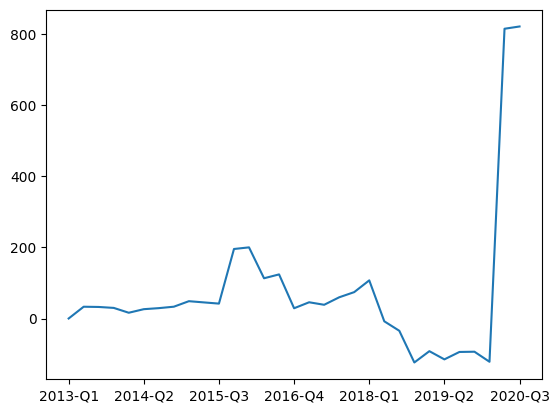

In [59]:
result.cumsum().plot()

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [53]:
result

2013-Q1      0.000000
2013-Q2     33.080000
2013-Q3     -0.668225
2013-Q4     -2.640358
2014-Q1    -13.603273
2014-Q2     10.010000
2014-Q3      2.935183
2014-Q4      4.038857
2015-Q1           NaN
2015-Q2     -3.424075
2015-Q3     -3.362945
2015-Q4    153.392854
2016-Q1      4.558599
2016-Q2    -86.793033
2016-Q3     10.859892
2016-Q4    -95.082434
2017-Q1     16.811064
2017-Q2     -7.050589
2017-Q3     21.015505
2017-Q4           NaN
2018-Q1     33.018740
2018-Q2   -114.976595
2018-Q3           NaN
2018-Q4    -89.016835
2019-Q1           NaN
2019-Q2    -23.030384
2019-Q3     20.832125
2019-Q4           NaN
2020-Q1    -28.235351
2020-Q2    935.410016
2020-Q3           NaN
dtype: float64

In [11]:
a = '2013Q1'
a.split('Q')

['2013', '1']

In [17]:
for i in a:
    print(i[:4])

2013
2013
2013
2013
2014
2014
2014
2014
2015
2015
2015
2015
2016
2016
2016
2016
2017
2017
2017
2017
2018
2018
2018
2018
2019
2019
2019
2019
2020
2020
2020
